<a href="https://colab.research.google.com/github/alist2000/ANN_and_DL/blob/master/NNDL_HW1/Code/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def bishop_backpropagation_equations():
    """
    Detailed explanation of Bishop's backpropagation equations
    Focusing on Chapter 5 neural network learning equations
    """
    print("Bishop's Backpropagation Equations Breakdown:\n")

    # Key Equations from Bishop's Book
    equations = [
        "1. Forward Propagation:",
        "   zj = Σ(wi,j * xi)  # Weighted sum for hidden layer",
        "   aj = tanh(zj)      # Hidden layer activation (hyperbolic tangent)",
        "   zk = Σ(wj,k * aj)  # Weighted sum for output layer",
        "   yk = zk            # Linear output",

        "\n2. Error Calculation:",
        "   E = 1/2 * Σ(tk - yk)^2  # Squared error loss",

        "\n3. Gradient Calculations:",
        "   δk = yk - tk             # Output layer error",
        "   δj = (1 - aj^2) * Σ(wj,k * δk)  # Hidden layer error",

        "\n4. Weight Update Rules:",
        "   Δwj,k = -η * δk * aj     # Output layer weight update",
        "   Δwi,j = -η * δj * xi     # Hidden layer weight update",

        "\n5. Key Parameters:",
        "   η (eta) = Learning Rate",
        "   tk = Target value",
        "   yk = Predicted value",
        "   aj = Hidden layer activations",
        "   xi = Input features"
    ]

    # Print equations
    for eq in equations:
        print(eq)

bishop_backpropagation_equations()

Bishop's Backpropagation Equations Breakdown:

1. Forward Propagation:
   zj = Σ(wi,j * xi)  # Weighted sum for hidden layer
   aj = tanh(zj)      # Hidden layer activation (hyperbolic tangent)
   zk = Σ(wj,k * aj)  # Weighted sum for output layer
   yk = zk            # Linear output

2. Error Calculation:
   E = 1/2 * Σ(tk - yk)^2  # Squared error loss

3. Gradient Calculations:
   δk = yk - tk             # Output layer error
   δj = (1 - aj^2) * Σ(wj,k * δk)  # Hidden layer error

4. Weight Update Rules:
   Δwj,k = -η * δk * aj     # Output layer weight update
   Δwi,j = -η * δj * xi     # Hidden layer weight update

5. Key Parameters:
   η (eta) = Learning Rate
   tk = Target value
   yk = Predicted value
   aj = Hidden layer activations
   xi = Input features


In [23]:
def forward(X, W1, W2):
    """
    Perform forward pass through a neural network with a hidden layer.

    Parameters:
    X (numpy.ndarray): Input features matrix of shape (N, D)
    W1 (numpy.ndarray): Weight matrix between input and hidden layer of shape (D, M)
    W2 (numpy.ndarray): Weight matrix between hidden and output layer of shape (M, 1)

    Returns:
    tuple: (y_pred, Z)
        y_pred (numpy.ndarray): Predicted outputs of shape (N, 1)
        Z (numpy.ndarray): Hidden layer activations of shape (N, M)
    """
    # Number of training samples
    N = X.shape[0]

    # Calculate hidden layer activations using hyperbolic tangent
    Z = np.tanh(np.dot(X, W1))

    # Calculate output layer (linear/identity activation)
    y_pred = np.dot(Z, W2)

    return y_pred, Z

In [62]:
def compute_metrics(y_true, y_pred):
    """
    Compute squared error loss and simple accuracy metrics.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: (squared_error, accuracy)
        squared_error: Sum of squared differences between predictions and true values
        accuracy: Proportion of predictions within 0.5 of true value
    """
    squared_error = np.sum((y_true - y_pred) ** 2)

    # Simple accuracy: predictions within 0.5 of true value
    accuracy = np.mean(np.abs(y_true - y_pred) < 0.5)
    return squared_error, accuracy

In [78]:
def plot_all_metrics(train_losses, train_accuracies, val_losses, val_accuracies, rms_errors, lr):
    """
    Plot all metrics including the original RMS plot.
    """
    fig = plt.figure(figsize=(20, 5))

    # Plot 1: Losses
    ax1 = plt.subplot(131)
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Squared Error')
    ax1.set_title(f'Loss Over Time (lr={lr})')
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Accuracies
    ax2 = plt.subplot(132)
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Over Time (lr={lr})')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    return fig

def plot_learning_curves(errors_list, learning_rates):
    """
    Plot error over time for different learning rates.
    """
    plt.figure(figsize=(10, 6))
    for i, (errors, lr) in enumerate(zip(errors_list, learning_rates)):
        plt.plot(errors, label=f'Learning Rate = {lr}')

    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Error vs. Iteration for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

In [79]:
def backward(X, y, M, iters, lr, X_val, y_val):
    """
    Train neural network using backpropagation.

    Parameters:
    X (numpy.ndarray): Input features matrix of shape (N, D)
    y (numpy.ndarray): True labels of shape (N, 1)
    M (int): Number of neurons in hidden layer
    iters (int): Number of training iterations
    lr (float): Learning rate

    Returns:
    tuple: (W1, W2, error_over_time)
        W1: Updated weight matrix for input to hidden layer
        W2: Updated weight matrix for hidden to output layer
        error_over_time: Array of errors for each iteration
    """
    # Get input dimensions
    N, D = X.shape

    # Initialize weights randomly with small values
    np.random.seed(42)
    W1 = np.random.randn(D, M) * 0.01
    W2 = np.random.randn(M, 1) * 0.01

    # Initialize error tracking array
    error_over_time = np.zeros(iters)

    # Initialize metric tracking arrays
    train_losses = np.zeros(iters)
    train_accuracies = np.zeros(iters)
    val_losses = np.zeros(iters)
    val_accuracies = np.zeros(iters)


    # Training loop
    for t in range(iters):
        # Forward pass
        y_pred, Z = forward(X, W1, W2)

        # Compute error (squared error)
        error = y_pred - y
        # error_over_time[t] = np.mean(error**2) # this is MSE
        error_over_time[t] = np.sum(error**2) # this is Squared Error

        # Backward propagation
        # Derivative of output layer (squared error loss)
        dL_dypred = 2 * error

        # Gradient for hidden to output weights
        dW2 = np.dot(Z.T, dL_dypred)

        # Gradient for hidden layer
        # Use derivative of tanh: 1 - tanh^2
        delta_hidden = dL_dypred.dot(W2.T) * (1 - Z**2)

        # Gradient for input to hidden weights
        dW1 = np.dot(X.T, delta_hidden)

        # Update weights
        W2 -= lr * dW2
        W1 -= lr * dW1

        # Forward pass on training data
        y_train_pred, _ = forward(X, W1, W2)
        train_losses[t], train_accuracies[t] = compute_metrics(y, y_train_pred)

        # Forward pass on validation data
        y_val_pred, _ = forward(X_val, W1, W2)
        val_losses[t], val_accuracies[t] = compute_metrics(y_val, y_val_pred)


    # Plot individual metrics
    fig = plot_all_metrics(train_losses, train_accuracies, val_losses, val_accuracies, rms_errors, lr)
    plt.show()


    return W1, W2, error_over_time


In [39]:
from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red (1).csv


In [80]:
def load_and_prepare_data(filename):
    """
    Load and preprocess the wine quality dataset according to the requirements.
    """
    # Load data
    data = pd.read_csv(filename)

    # Separate features and target
    X = data.drop('quality', axis=1).values
    y = data['quality'].values.reshape(-1, 1)

    # Split data (50% train, 50% test)
    N = X.shape[0]
    train_size = int(0.5 * N)

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]

    # Standardize features using only training data
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)

    X_train = (X_train - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std

    # Add bias column (ones) to the beginning of feature matrices
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    return X_train, X_test, y_train, y_test


Training with learning rate: 1e-06


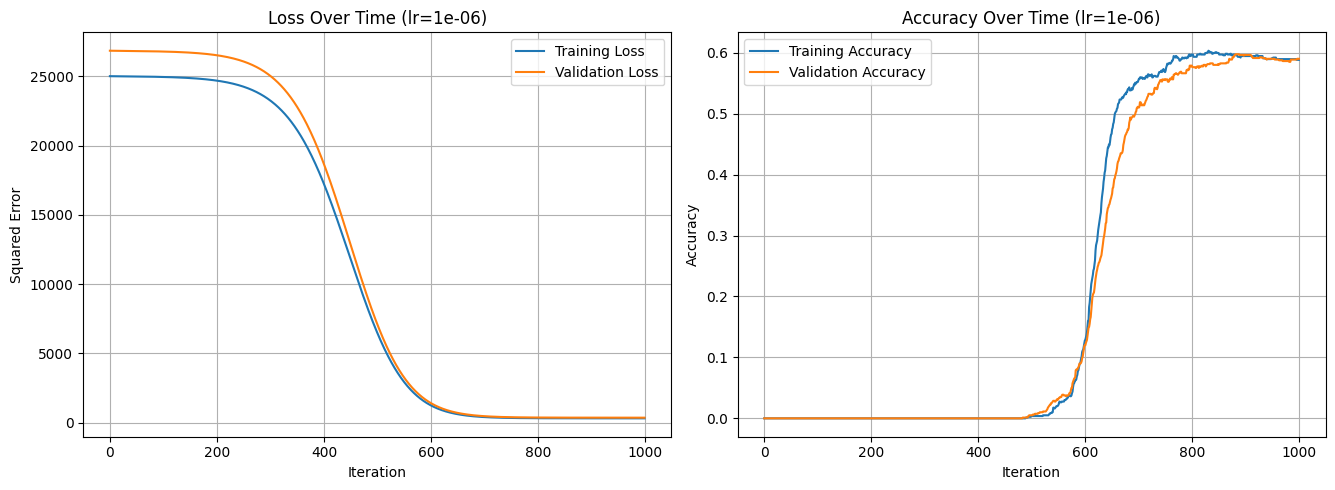

RMSE for learning rate 1e-06: 0.6761

Training with learning rate: 1e-05


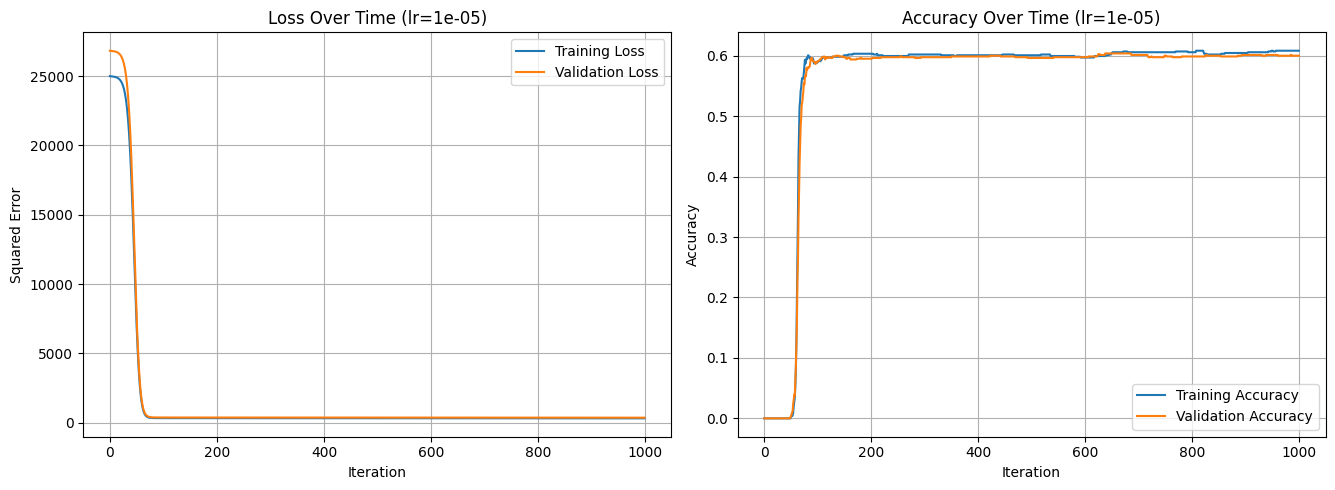

RMSE for learning rate 1e-05: 0.6638

Training with learning rate: 0.0001


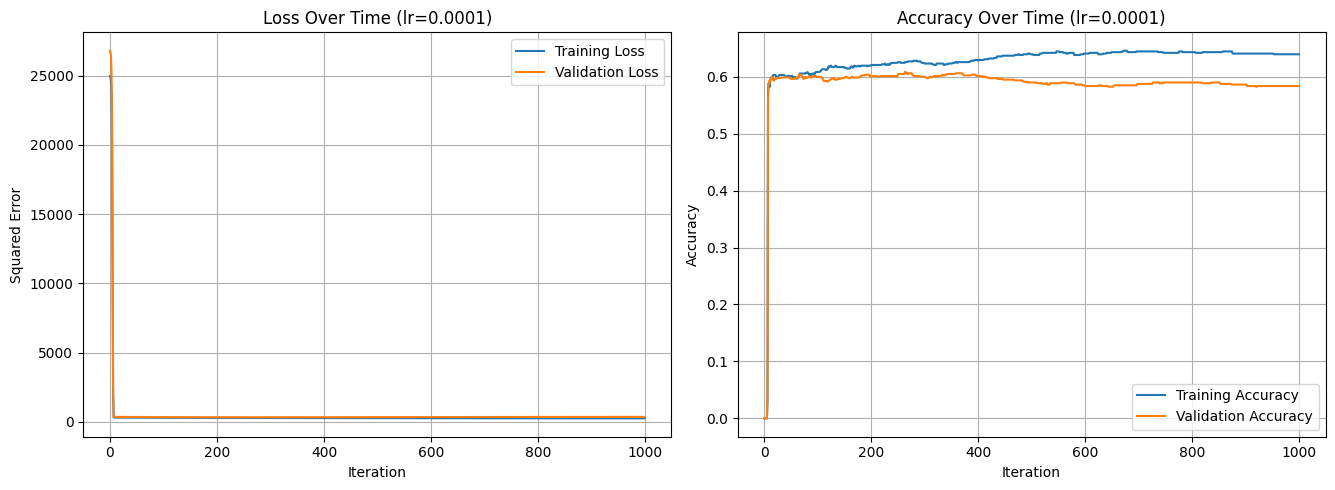

RMSE for learning rate 0.0001: 0.6763


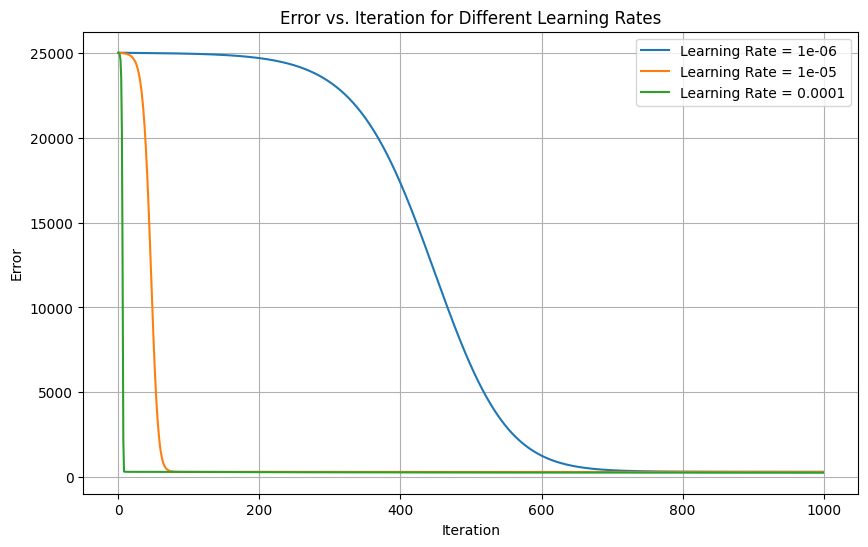


Best learning rate: 1e-05
Best RMSE: 0.6638


In [84]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def train_and_evaluate(X_train, X_test, y_train, y_test, learning_rates):
    """
    Train and evaluate the model with different learning rates
    """
    M = 30  # Number of hidden neurons
    iterations = 1000
    errors_list = []
    rmse_list = []

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")

        # Train the model
        W1, W2, errors = backward(X_train, y_train, M, iterations, lr, X_test, y_test)
        errors_list.append(errors)

        # Make predictions
        y_pred, _ = forward(X_test, W1, W2)

        # Calculate RMSE
        rmse = calculate_rmse(y_test, y_pred)
        rmse_list.append(rmse)
        print(f"RMSE for learning rate {lr}: {rmse:.4f}")

    return errors_list, rmse_list


# Load and prepare data
filename = "winequality-red.csv"
X_train, X_test, y_train, y_test = load_and_prepare_data(filename)

# Define learning rates to test
learning_rates = [0.000001, 0.00001, 0.0001]

# Train and evaluate for each learning rate
errors_list, rmse_list = train_and_evaluate(X_train, X_test, y_train, y_test, learning_rates)

# Plot learning curves
plot_learning_curves(errors_list, learning_rates)

# Print best learning rate
best_lr_idx = np.argmin(rmse_list)
print(f"\nBest learning rate: {learning_rates[best_lr_idx]}")
print(f"Best RMSE: {rmse_list[best_lr_idx]:.4f}")